<a href="https://colab.research.google.com/github/grbruns/cst383/blob/master/College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration and prediction with US college data

### Glenn Bruns, CSUMB

The 1995 issue of US News and World Report contains data about 777 US Colleges.  The data set consists of 18 variables that describe, for each college, whether it is public or private, the number of applications received, the number of fulltime undergrads, etc.  We will explore and visualize this data set and then build a predictive model.

The data set is available on [this Kaggle page](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data) and also through a github link a provide below.

The text cells in this notebook are formatted using "markdown".  See the [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) for basic information about Colaboratory markdown.


First we import some of the Python packages we will use.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Set the graphics style.

In [0]:
sns.set()
sns.set_context('notebook')

## Read the data

Using the Pandas function 'read_csv', you can read data using a web link.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/College.csv', index_col=0)

The 'index_col=0' option says that the college name (which is column 0 of the data), should be used as the index into the data set.

## Preliminary exploration


As is usually the case, the data has the form of a table, with each row an *example*, and each column a *feature*. 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


We see that this data set consists of 777 examples.  Each example consists of 18 features.  Most of the features have integer values.  The student/faculty ratio value is a floating point number.  The documentation supplied with the data set defines the features as follows:

Feature | Description
:------ | :----------
`Private` | A factor with levels No and Yes indicating private or public university
`Apps` | Number of applications received
`Accept` | Number of applications accepted
`Enroll` | Number of new students enrolled
`Top10perc` | Pct. new students from top 10% of H.S. class
`Top25perc` | Pct. new students from top 25% of H.S. class
`F.Undergrad` | Number of fulltime undergraduates
`P.Undergrad` | Number of parttime undergraduates
`Outstate` | Out-of-state tuition
`Room.Board` | Room and board costs
`Books` | Estimated book costs
`Personal` | Estimated personal spending
`PhD` | Pct. of faculty with Ph.D.’s
`Terminal` | Pct. of faculty with terminal degree
`S.F.Ratio` | Student/faculty ratio
`perc.alumni` | Pct. alumni who donate
`Expend` | Instructional expenditure per student
`Grad.Rate` | Graduation rate

Let's look at the first few rows of the data set.

In [0]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


How many public and private colleges are represented in this data set?

In [0]:
df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

Is the data set complete?  None and nan values would suggest data is missing.

In [0]:
df.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

The output indicates that there is no obviously missing data.

## Data Exploration and Visualization

Let's start diving into the data to answer some basic questions.  First, how big are the colleges?  A *histogram* shows use the distribution of a single numeric variable.

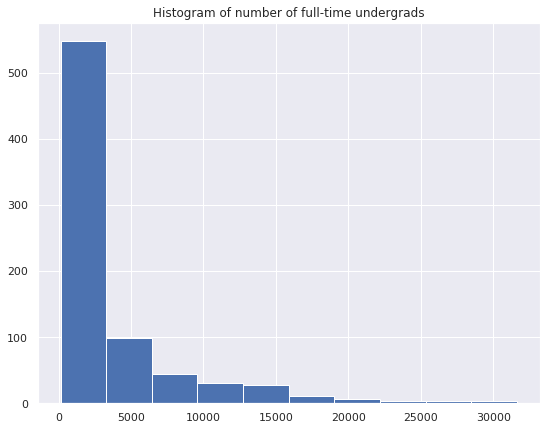

In [0]:
plt.figure(figsize=(9,7))           # set the figure size
plt.hist(df['F.Undergrad'])         # create a histogram using matplotlib
plt.title('Histogram of number of full-time undergrads');    # set the plot title

This plot shows that there are many small colleges, and a few very large colleges.  The bar on the left represents colleges that have less than about 3000 undergraduates.  The height of the bar is about 550, so about of the colleges in the data set have less than about 3000 undergrads.  The next bar is for colleges with about 3000 to 6000 undergrads.  As you can see from the height of the bar, there are about 100 colleges of this size.

The histogram of college sizes can also be created with the Seaborn visualization package.

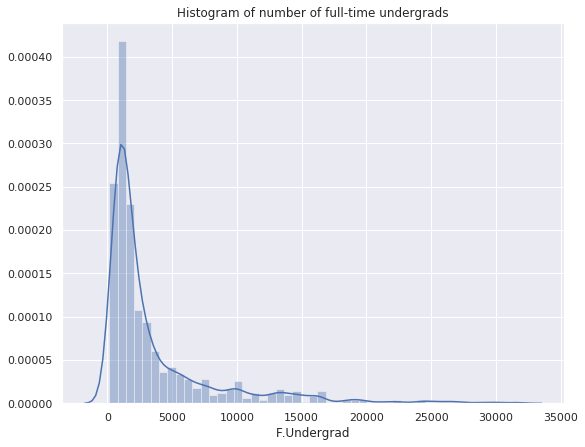

In [0]:
plt.figure(figsize=(9,7))           # set the figure size
sns.distplot(df['F.Undergrad'])     # create a histogram with Seaborn
plt.title('Histogram of number of full-time undergrads');    # set the plot title

A nice feature of using Seaborn for a histogram is that is automatically adds a density plot, which is the smoothed line superimposed on the histogram.  The bars in this plot represent a narrower range of college sizes, which helps in getting a clearer view of the size of the smaller colleges.

Let's use a histogram again to get an idea of the distribution of college tuition.  The values in the 'Outstate' column of the data represent the out-of-state yearly tuition for each college.

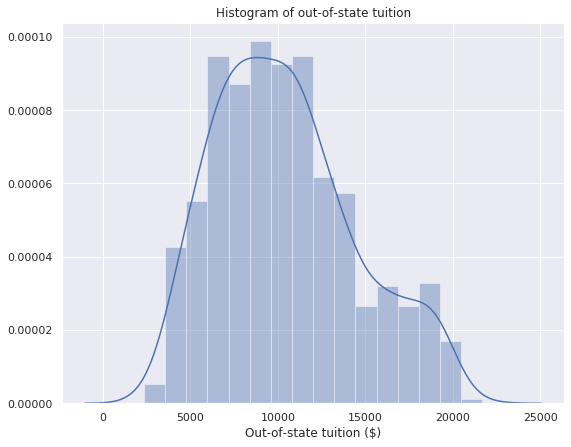

In [0]:
plt.figure(figsize=(9,7))        # set the figure size
sns.distplot(df['Outstate'])     # create a histogram with Seaborn
plt.title('Histogram of out-of-state tuition')    # set the plot title
plt.xlabel('Out-of-state tuition ($)');

We find that in 1995 a typical college tuition was about $10,000/year.

Histograms show the distribution of numeric data.  Most of the variables in this dataset are numeric.  Let's create a new variable so that we can try visualizing non-numeric ("categorical") data.

In [0]:
# create a new numeric variable showing the percent of applicants who were accepted
df['perc.accept'] = (100*df.Accept/df.Apps).round(1)

# create a new categorical variable showing how selective a college is
breaks = [0,50,75,100]
df['Selective'] = pd.cut(df['perc.accept'],
			   include_lowest=True, bins=breaks,
			   labels=['high', 'medium', 'low'])

The `Apps` column in the data gives the number of applicants, and the `Accept` column gives the number of accepted applicants.  
Let's look at the distribution of the new `perc.accept` values.

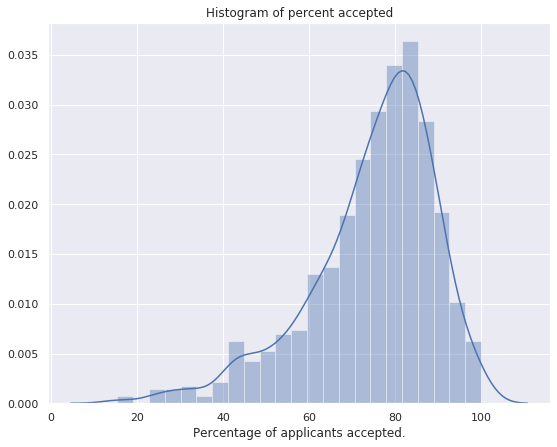

In [0]:
plt.figure(figsize=(9,7))        # set the figure size
sns.distplot(df['perc.accept'])  # create a histogram with Seaborn
plt.title('Histogram of percent accepted')    # set the plot title
plt.xlabel('Percentage of applicants accepted.');

We see that colleges commonly accept 80% of applicants, and relatively few colleges accept less than 40% of applicants.  I wonder if colleges today are more selective.

Now let's visualize the distribution of values of the new `Selective` column.  As a first step, let's count how many colleges are in each category of selectivity.

In [0]:
df['Selective'].value_counts()

low       445
medium    274
high       58
Name: Selective, dtype: int64

The possible values of the `Selective` variable are low, medium, and high.  We defined the value to be low when 75% or more of applicants are accepted and high when 50% or less of applicants are accepted.  The `value_counts()` function counts the number of colleges associated with each of these values.  It is easy to plot these counts with a Pandas bar plot.

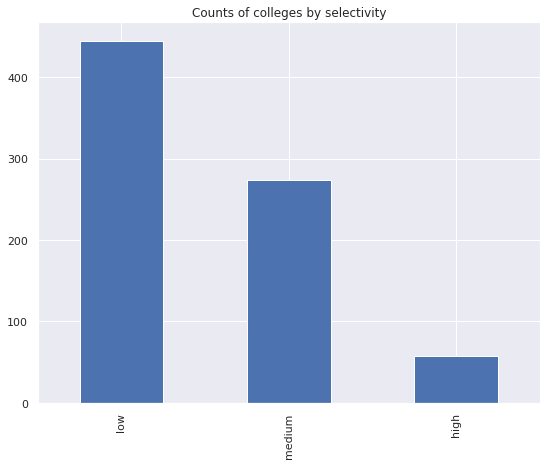

In [0]:
plt.figure(figsize=(9,7))        # set the figure size
df['Selective'].value_counts().plot.bar()   # a Pandas bar plot
plt.title('Counts of colleges by selectivity');

Are larger colleges more expensive than public ones?  This is a basic question, but one that involves looking at multiple variables at a time.  If both variables are numeric, a basic visualization tool is the scatterplot.

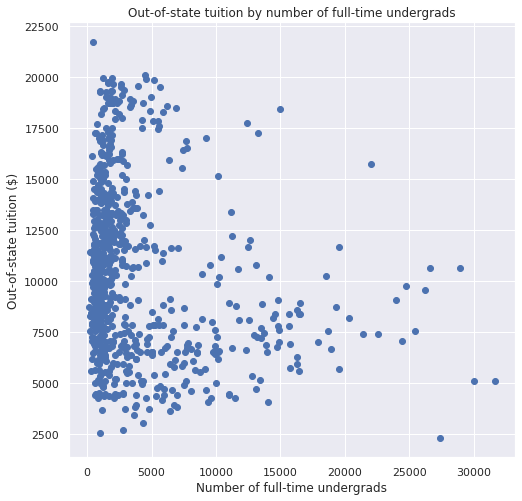

In [0]:
plt.figure(figsize=(8,8))        # set the figure size
plt.scatter(df['F.Undergrad'], df['Outstate'])  # a matplotlib scatterplot
plt.title('Out-of-state tuition by number of full-time undergrads');
plt.xlabel('Number of full-time undergrads')
plt.ylabel('Out-of-state tuition ($)');

Looking at the left of this plot we see that tuition at small college varies widely.  Looking at the right we wee that, on average, larger colleges tend to have lower tuition.  (Remember that this is 1995 data.)
A great feature of a scatter plot is that it shows all the data.  When looking at a scatter plot it is wise to look for unusual points, like the point at the bottom right.  Assuming the data is correct, this point represents a very large and very inexpensize college.

Are private colleges more expensive than public ones?  This question again involves two variables, but this time one of the variables is numeric and one is categorical.  An easy way to visualize these kinds of situations is with a Seaborn bar plot.

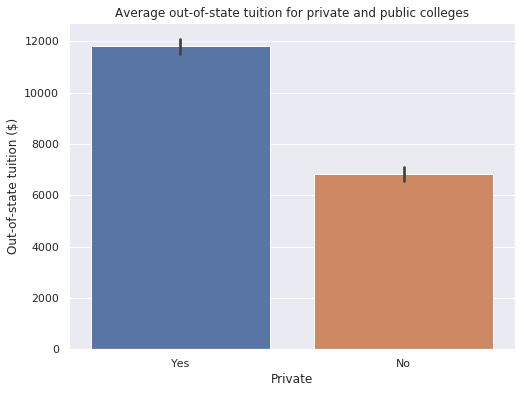

In [0]:
plt.figure(figsize=(8,6))        
sns.barplot(x='Private', y='Outstate', data=df)     # a Seaborn bar plot
plt.title('Average out-of-state tuition for private and public colleges')
plt.ylabel('Out-of-state tuition ($)');

It's possible to visualize more than two variables at a time.  For example, we can visualize two numeric variables plus a single categorical variable by coloring the dots in the scatter plot.

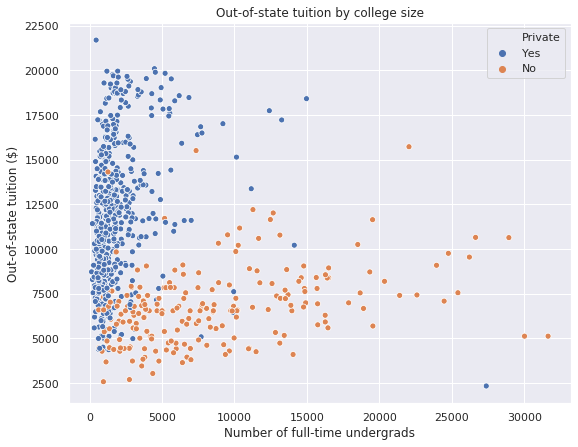

In [0]:
plt.figure(figsize=(9,7))       
sns.scatterplot(x='F.Undergrad', y='Outstate', data=df, hue='Private')
plt.title('Out-of-state tuition by college size')
plt.ylabel('Out-of-state tuition ($)')
plt.xlabel('Number of full-time undergrads');

Seaborn made it easy to create this fancy plot.  Notice that the plot legend was created automatically.  The unusual plot on the lower-right is now revealed to be an exceptionally cheap private college.  

In this plot above we used color to distinguish private and public colleges, but the style of plotted point can also be used, either in addition to color or as an alternative.   

## Machine Learning

If you have data about a college, can you predict whether the college is public or private?  Can you predict the tuition of the college?  We will use machine learning to try to answer these questions.

The basic idea is that we will create a *predictive model* by showing a machine learning algorithm a bunch of example colleges, and for each college, provide a label that shows whether the college is public or private.  After the algorithm has seen enough examples, it will find patterns in the data and will be able to predict whether a new college is public or private.

We will use the Scikit-Learn package, which supports many machine-learning algorithms.

Before using machine learning, we will perform three steps of data preparation:
1. make all variables numeric
2. randomly split the rows of the data set into two groups: the *training data* used to train the machine the machine learning algorith, and the *test data* used to test the quality of the predictions made by the machine learning algorithm.
3. *scale* the training and test data so that values of all columns cover about the same range of values


Here are Python packages we will use for machine learning.

In [0]:
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsRegressor

### Predicting whether a college is public or private

---



We will see how well we can predict whether a college is private based on its
out-of-state tuition and number of full-time undergraduates.  In other words, we will use out-of-state tuition and number of full-time undergraduates as our *predictor* variables, and whether the college is Private as our *target* variable.

In [0]:
predictors = ['F.Undergrad', 'Outstate']
target = 'Private'
X = df[predictors].values
y = (df[target] == 'Yes').astype('int').values

We randomly split the rows of the data set into two groups: the training data used to train the machine the machine learning algorith, and the test data used to test the quality of the predictions made by the machine learning algorithm.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We will use the Scikit-Learn package for machine learning.  With Scikit-Learn, we need to *standardize* the data by making sure all variables cover about the same range.  

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let's look at the first rows of our training data set.  The first column contains information about the number of full-time undergraduates.  The data has been scaled, so a number that is negative represents a college that is smaller than average.  Similar, the second column is scaled data about the college tuition.

In [0]:
print(X_train[:10,:])

[[-0.388525   -0.15998176]
 [-0.43238556 -0.14882234]
 [-0.75388346 -0.42855168]
 [-0.57931843 -1.09067696]
 [-0.66660095 -0.4756692 ]
 [-0.65958326  1.68132171]
 [-0.12799327  0.58695508]
 [-0.12514234 -1.20797481]
 [-0.47054425  0.76426579]
 [-0.55387931 -0.26240039]]


We are ready to build a predictive model.  We will build a *classifier* that will predict whether a college is private or not.  There are many kinds of classifiers; we will build a *decision tree* classifier.  To build the classifier, we need to feed it the training data set we created earlier.

In [0]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The exciting part is to use this classifier to make predictions.  We will ask it to make predictions for the colleges in the test data set.  It has not seen information about these colleges before.

In [0]:
predictions = clf.predict(X_test)

How many of the predictions are correct?  Let's compare the first ten predictions with the correct answers.

In [0]:
print(predictions[:10])
print(y_test[:10])

[0 0 0 1 1 1 1 0 1 0]
[0 0 0 1 1 1 1 0 1 0]


The first prediction is 0, and the correct answer is 0, so the first prediction is correct.  In fact, all 10 predictions are correct.  We can easily calculate the *accuracy* of our classifier, which is the fraction of predictions that are correct.  An accuracy value ranges from 0 to 1, with 1 meaning that all predictions are correct.

In [0]:
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.923


Our predictions were correct about 92% of the time.  We can display our decision tree classifier to see how it makes its predictions.

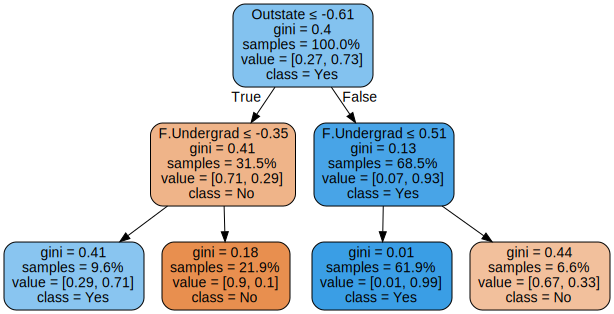

In [0]:
# create the decision tree image
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     class_names=['No', 'Yes'],  
                     filled=True, rounded=True,  
                     special_characters=True)

# plot it
graph = graphviz.Source(dot_data)  
graph

A decision is made by working downward from the top node of the tree.  The nodes of the bottom level represent a prediction.  If class = Yes, then the prediction is that the college is private; otherwise the prediction is that the college is public.  For example, at the top node of the tree we look at whether the out-of-state tuition value (after scaling) is less than -0.61.  If so move to the child node that the 'True' arrow points to, and otherwise move to the child node that the 'False' arrow points to.

Summarizing the tree: a college is predicted to be private if the out-of-state is tuition is below -0.61 and the number of undergraduates is below -0.35, or if the out-of-state-tuition is above -0.61 and number of undergraduates is less than 0.51.  Otherwise a college is predicted to be public.

### Predicting a college's tuition

Let's try to predict a college's tuition based on how selective it is and how many full-time undergraduates it has.  We will perform data preparation similarly to what we did when predicting public or private.

In [0]:
predictors = ['perc.accept', 'F.Undergrad']
target = 'Outstate'
X = df[predictors].values
y = df[target].values

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Our last predictive model was a classifier -- it predicted one of two classes: public or private.  Now we will build a predictive model to predict out-of-state tuition, which is not a class, but a number.  This kind of predictive model is called a *regressor*.  The specific kind of regressor we will create is a k-nearest-neighbor (KNN) regressor.

In [0]:
regr = KNeighborsRegressor()
regr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Now we will predict tuition values with our model using the test data set.

In [0]:
predictions = regr.predict(X_test)

As before, let's compare our predictions with the correct values.

In [0]:
print(predictions[:10].astype(int))
print(y_test[:10])

[ 9606  7985  6560 12579 11182 10447  9574  9116 10597  6127]
[ 6550  4680  8907 10335  6400 10390 11240  3648 12520  6684]


For the first college in the test set, our predicted tuition is \$9606 and the actual tuition is \$6550.  That is not very close.  For the second college we predicted \$7985 but the actual is \$4680.  Again, not very close.

One way to measure the overall error in our predictions is to look at the average squared difference between the predicted and actual tuition.  This is called the *mean squared error*, or MSE.

In [0]:
mse = ((predictions - y_test)**2).mean()
print('MSE: {0:.0f}'.format(mse))

MSE: 12178150


We can also compare our predictions to the actual values by plotting the error as a histogram

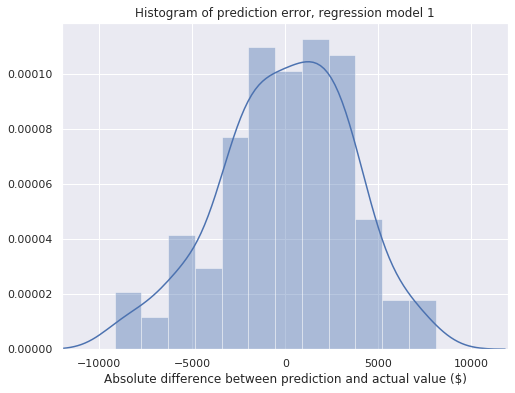

In [0]:
plt.figure(figsize=(8,6))
sns.distplot(predictions - y_test)
plt.title('Histogram of prediction error, regression model 1')
plt.xlabel('Absolute difference between prediction and actual value ($)')
plt.xlim(-12000, 12000);

Our tuition predictions were based on only college selectivity and size.  Could we do better by using more variables.  For example, could we make better predictions by also looking at 4-year graduation rate, student/faculty ratio, and precentage of faculty with PhDs?

In [0]:
predictors = ['perc.accept', 'F.Undergrad', 'Grad.Rate', 'S.F.Ratio', 'PhD']
target = 'Outstate'
X = df[predictors].values
y = df[target].values

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
regr = KNeighborsRegressor()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

# print predictions and actual values
print(predictions[:10].astype(int))
print(y_test[:10])

[ 6823  6393 10492 14652  7861 10653 13421  5581  8969  4591]
[ 6550  4680  8907 10335  6400 10390 11240  3648 12520  6684]


These predictions look much better.  Is the new mean squared error value lower than before?

In [0]:
mse = ((predictions - y_test)**2).mean()
print('MSE: {0:.0f}'.format(mse))

MSE: 6146413


Let's plot the error as we did we our previous model.

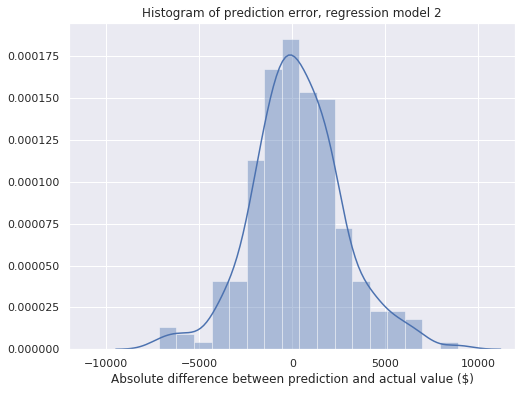

In [0]:
plt.figure(figsize=(8,6))
sns.distplot(predictions - y_test)
plt.title('Histogram of prediction error, regression model 2')
plt.xlabel('Absolute difference between prediction and actual value ($)')
plt.xlim(-12000, 12000);

It's easy to see that on average our predictions are better than with our previous predictive model.

## Conclusions

If you'd like to do more with this data set, here are some other things to try:
- produce histograms for some of the other variables in the data set
- produce scatterplots for other pairs of variables in the data set
- try finding three predictor variables that give the best classification accuracy
- see which predictor variables give the lowest MSE 

We just covered the absolute basics of data exploration and predictive modeling.  To learn more, a couple of good and accessible books are:
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 2 (Aerelion Geron)
- Python Data Science Handbook (Jake VanderPlas)